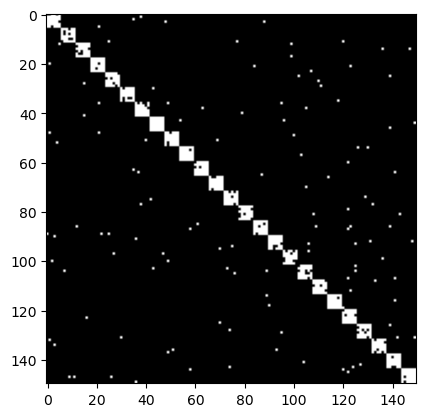

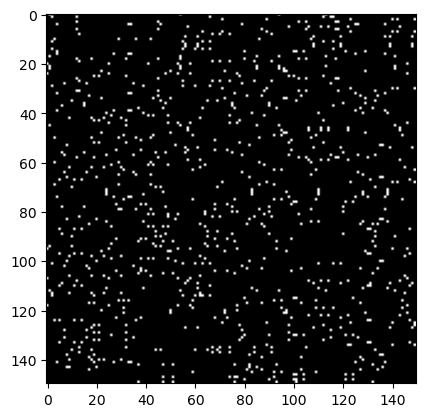

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from irmlearn import IRM


# Takes 4 parameters, l for nr. of clusters,
# k for nodes in clsuters, p and q for connective
# probabilities inside and outside groups.
def ClusterGraph(l, k, p, q):
    n = l * k
    adjacency = np.zeros((n, n))
    for i in range(n):
        for j in range(n):


            prob = np.random.rand(2)

            if i // k == j // k and prob[0] < p:
                adjacency[i, j] = 1

            elif prob[1] < q:
                adjacency[i, j] = 1

    return adjacency


def block_diag(A, B):
    c1 = np.zeros((A.shape[0], B.shape[1]))

    c2 = np.zeros((B.shape[0], A.shape[1]))

    return np.block([[A, c1],
                     [c2, B]])


l = 25
k = 6

A_adj = ClusterGraph(l, k, 0.9, 0.005)

idxs = np.random.permutation(l * k)
inv_idxs = np.argsort(idxs)

A_random = A_adj[idxs][:, idxs]

Ar = A_adj[np.random.permutation(l*k)]
Ar = Ar[:, np.random.permutation(l*k)]

# A = nx.from_numpy_array(A_random)
# nx.draw(A, node_size=30)

plt.figure()
plt.imshow(A_adj, cmap='gray')

plt.figure()
plt.imshow(Ar, cmap='gray')


In [2]:

alpha = 1.5
a = 0.1
b = 0.1
max_iter = 50

model = IRM(alpha, a, b, max_iter, verbose=True, use_best_iter=True, random_state = 42)

model.fit(Ar)

TypeError: __init__() got an unexpected keyword argument 'random_state'

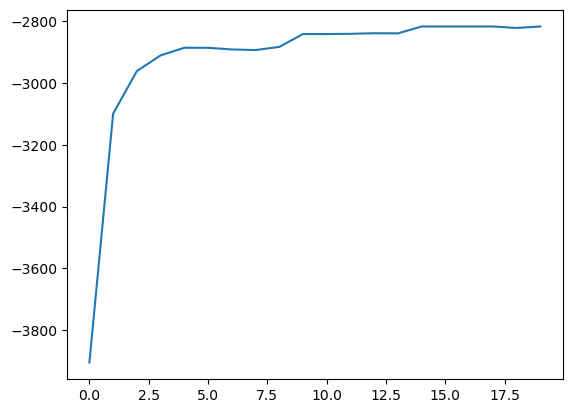

In [ ]:
plt.plot(model.history_)

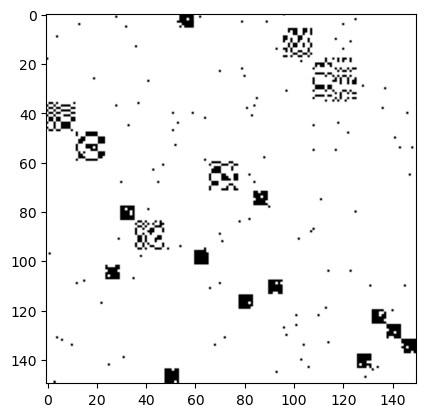

In [ ]:
row_index = np.argsort(model.sample_labels_)
col_index = np.argsort(model.feature_labels_)
A_re = Ar[row_index, :][:, col_index]

#inv_idxs = np.argsort(idxs)
#A_re= A_random[inv_idxs,:][:,inv_idxs]

plt.imshow(A_re,cmap='Greys')

In [ ]:
model._calc_posterior(A_random) # We are down the rabit hole of private methods here. 
print(model._logv_cur)
# We might be using IRM incorrectly. The demo describes the axes differently, where the rows are the data points
# and the columns are the features. In that case, it makes a lot more sense to scramble the order of the features/labels
# like this, and the result makes a lot more sense. (data points 1-10 might now be 50-60, and label 1 might be label 9)
# The problem for us is that both axes of the adjacency matrix describe the same thing. It gets tough to interpret
# the result unless we can unscramble the post processed IRM fit. 
# They get the exact same thing in the IRM demo. The interpretation makes sense there thgouh. 
# There must be a way around this.